In [1]:
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv("amazon_sales_dataset.csv")


print(f"✅ Loaded {len(df)} trips with {df.shape[1]} columns")
df.head()


✅ Loaded 50000 trips with 13 columns


,order_id,order_date,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue
0,1,2022-04-13,2637,Books,128.75,10,4,North America,UPI,3.5,443,115.88,463.52
1,2,2023-03-12,2300,Fashion,302.60,20,5,Asia,Credit Card,3.7,475,242.08,1210.40
2,3,2022-09-28,3670,Sports,495.80,20,2,Europe,UPI,4.4,183,396.64,793.28
3,4,2022-04-17,2522,Books,371.95,15,4,Middle East,UPI,5.0,212,316.16,1264.64
4,5,2022-03-13,1717,Beauty,201.68,0,4,Middle East,UPI,4.6,308,201.68,806.72


In [3]:
# Basic stats
print("📊 Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"\nTarget stats:")
print(df['total_revenue'].describe())

📊 Dataset Info:
Shape: (50000, 13)
Missing values: 0

Target stats:
count    50000.000000
mean       657.331475
std        526.223968
min          3.840000
25%        240.320000
50%        505.410000
75%        968.970000
max       2499.550000
Name: total_revenue, dtype: float64


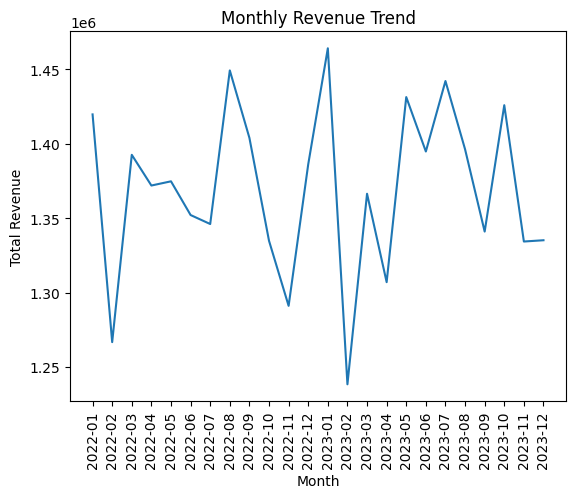

In [4]:
# Convert date
df['order_date'] = pd.to_datetime(df['order_date'])
# ---- Monthly Sales Trend ----
df['month'] = df['order_date'].dt.to_period('M')
monthly_revenue = df.groupby("month")["total_revenue"].sum()

plt.figure()
plt.plot(monthly_revenue.index.astype(str), monthly_revenue.values)
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.title("Monthly Revenue Trend")
plt.xticks(rotation=90)
plt.show()

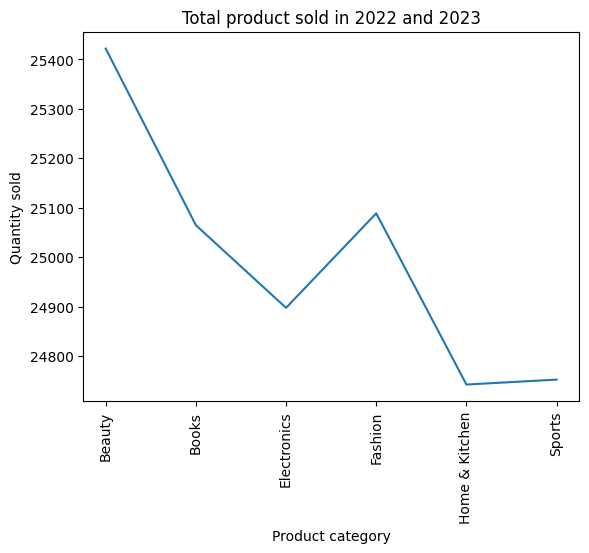

In [5]:
category_sales = df.groupby("product_category")["quantity_sold"].sum()

plt.figure()
plt.plot(category_sales.index, category_sales.values)
plt.xlabel("Product category")
plt.ylabel("Quantity sold")
plt.title("Total product sold in 2022 and 2023")
plt.xticks(rotation=90)
plt.show()


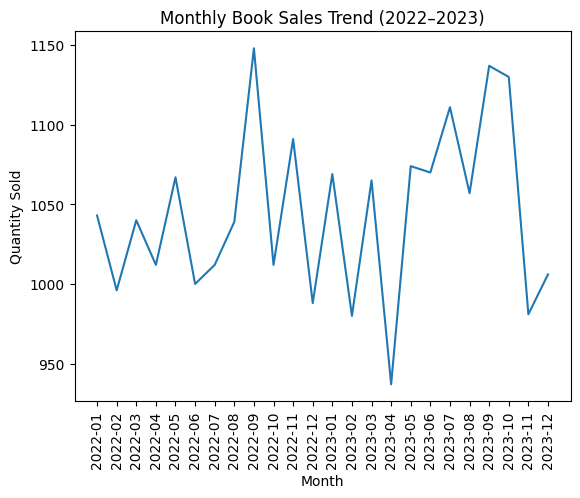

In [6]:
# Filter only Books category
books_df = df[df["product_category"] == "Books"]

# Group by month and sum quantity sold
books_monthly_sales = books_df.groupby("month")["quantity_sold"].sum()
plt.figure()
plt.plot(books_monthly_sales.index.astype(str), books_monthly_sales.values)
plt.xlabel("Month")
plt.ylabel("Quantity Sold")
plt.title("Monthly Book Sales Trend (2022–2023)")
plt.xticks(rotation=90)
plt.show()


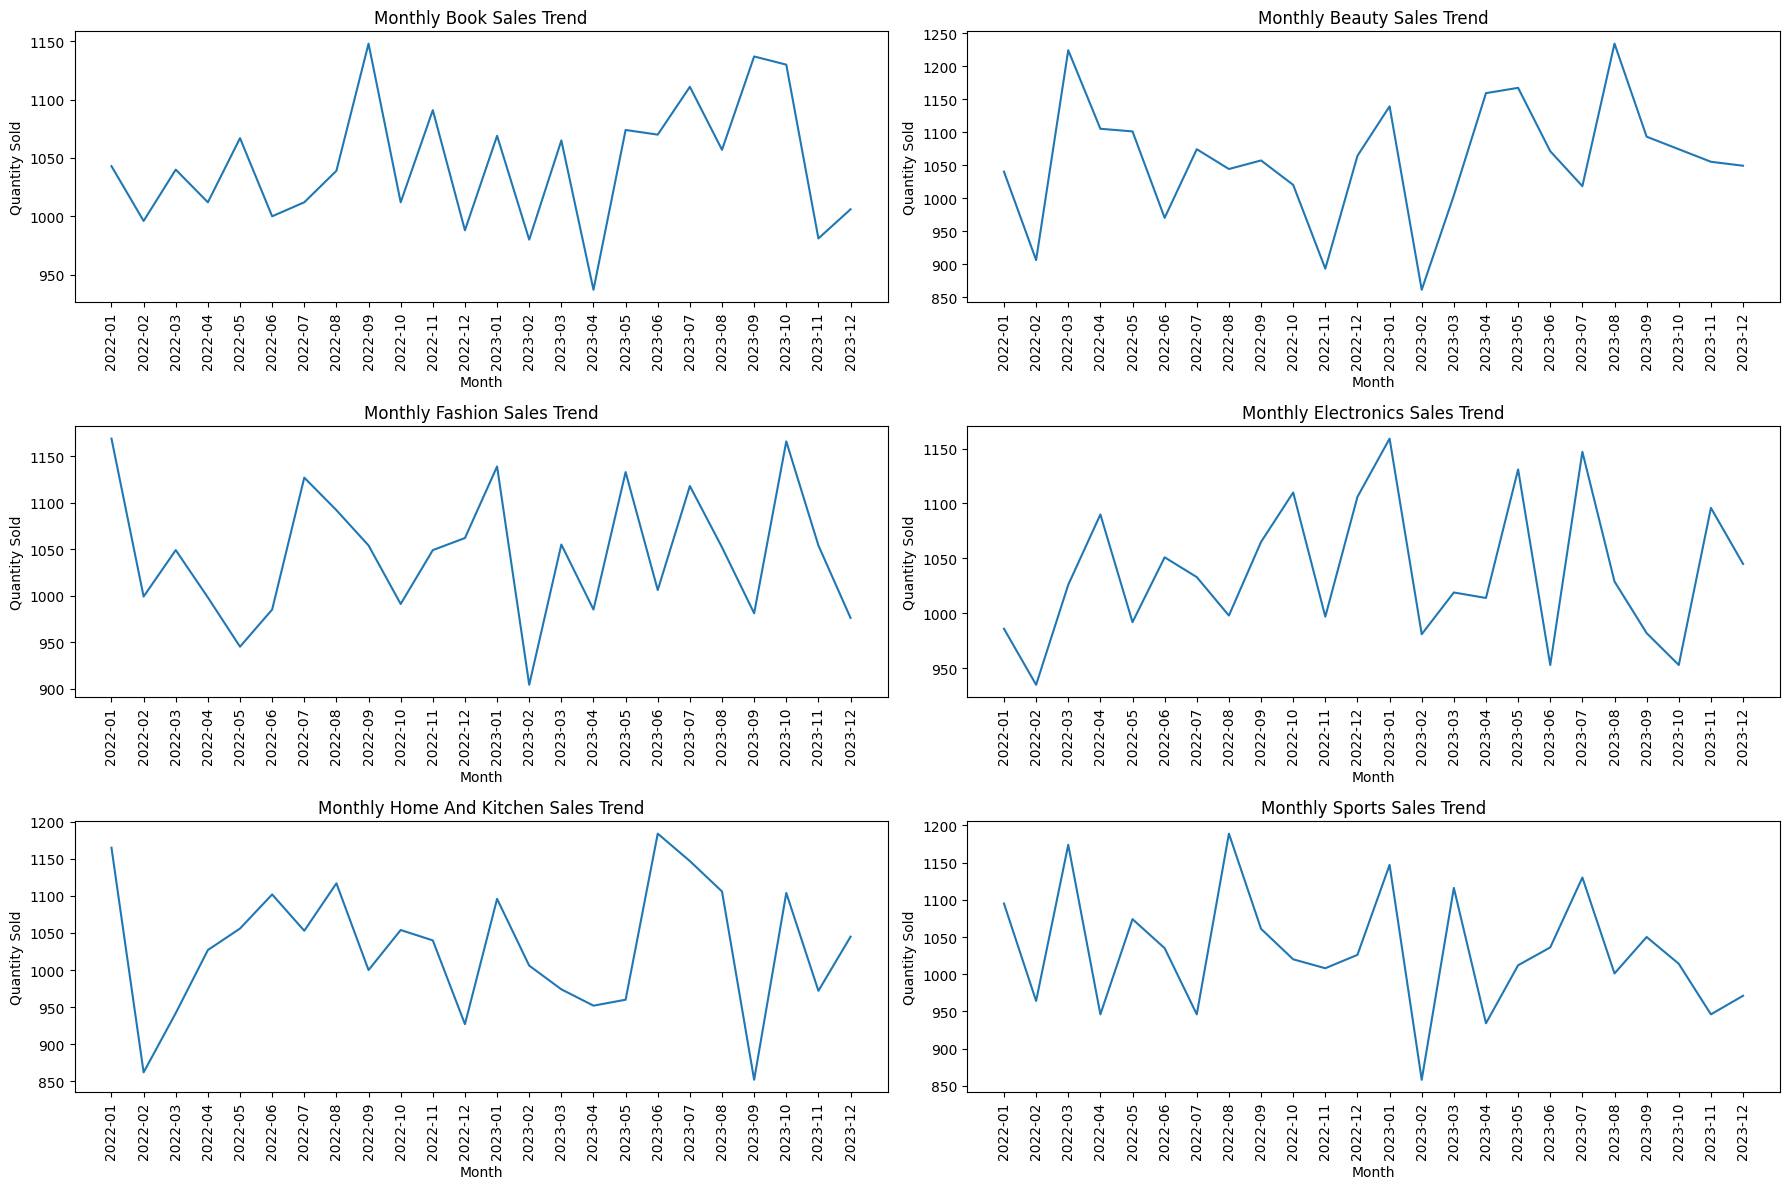

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(18, 12))
# Filter Books category
books_df = df[df["product_category"] == "Books"]
# Monthly quantity sold
books_monthly_sales = books_df.groupby("month")["quantity_sold"].sum()
axes[0,0].plot( books_monthly_sales.index.astype(str), books_monthly_sales.values)
axes[0,0].set_title("Monthly Book Sales Trend")
axes[0,0].set_xlabel("Month")
axes[0,0].set_ylabel("Quantity Sold")
axes[0,0].tick_params(axis='x', rotation=90)

beauty_df = df[df["product_category"] == "Beauty"]
beauty_monthly_sales = beauty_df.groupby("month")["quantity_sold"].sum()
axes[0,1].plot( beauty_monthly_sales.index.astype(str), beauty_monthly_sales.values)
axes[0,1].set_title("Monthly Beauty Sales Trend")
axes[0,1].set_xlabel("Month")
axes[0,1].set_ylabel("Quantity Sold")
axes[0,1].tick_params(axis='x', rotation=90)

fashion_df = df[df["product_category"] == "Fashion"]
fashion_monthly_sales = fashion_df.groupby("month")["quantity_sold"].sum()
axes[1,0].plot( fashion_monthly_sales.index.astype(str), fashion_monthly_sales.values)
axes[1,0].set_title("Monthly Fashion Sales Trend")
axes[1,0].set_xlabel("Month")
axes[1,0].set_ylabel("Quantity Sold")
axes[1,0].tick_params(axis='x', rotation=90)

electronics_df = df[df["product_category"] == "Electronics"]
electronics_monthly_sales = electronics_df.groupby("month")["quantity_sold"].sum()
axes[1,1].plot( electronics_monthly_sales.index.astype(str), electronics_monthly_sales.values)
axes[1,1].set_title("Monthly Electronics Sales Trend")
axes[1,1].set_xlabel("Month")
axes[1,1].set_ylabel("Quantity Sold")
axes[1,1].tick_params(axis='x', rotation=90)

homekitchen_df = df[df["product_category"] == "Home & Kitchen"]
homekitchen_monthly_sales = homekitchen_df.groupby("month")["quantity_sold"].sum()
axes[2,0].plot( homekitchen_monthly_sales.index.astype(str), homekitchen_monthly_sales.values)
axes[2,0].set_title("Monthly Home And Kitchen Sales Trend")
axes[2,0].set_xlabel("Month")
axes[2,0].set_ylabel("Quantity Sold")
axes[2,0].tick_params(axis='x', rotation=90)

sports_df = df[df["product_category"] == "Sports"]
sports_monthly_sales = sports_df.groupby("month")["quantity_sold"].sum()
axes[2,1].plot( sports_monthly_sales.index.astype(str), sports_monthly_sales.values)
axes[2,1].set_title("Monthly Sports Sales Trend")
axes[2,1].set_xlabel("Month")
axes[2,1].set_ylabel("Quantity Sold")
axes[2,1].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

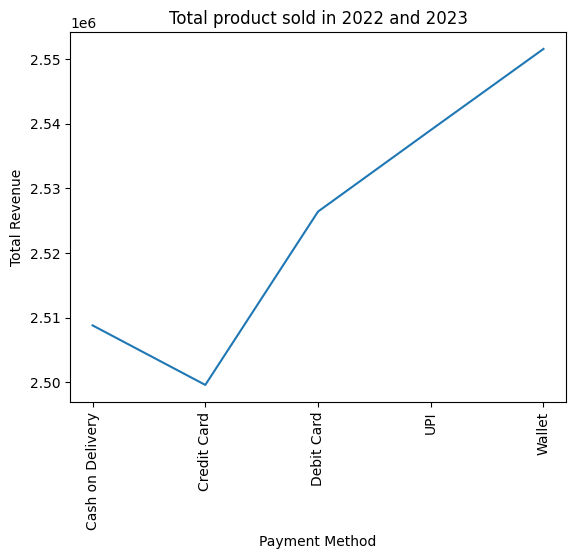

In [8]:
payment_mode = df.groupby("payment_method")["price"].sum()

plt.figure()
plt.plot(payment_mode.index, payment_mode.values)
plt.xlabel("Payment Method")
plt.ylabel("Total Revenue")
plt.title("Total product sold in 2022 and 2023")
plt.xticks(rotation=90)
plt.show()


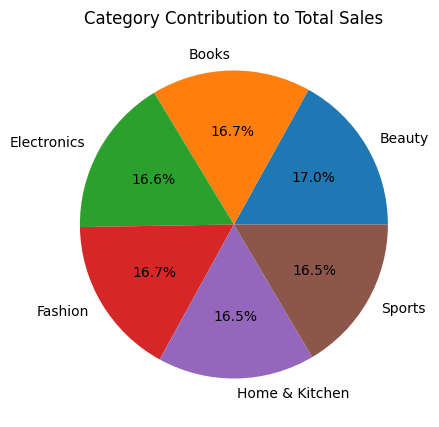

In [13]:
category_total_sales = (
    df.groupby("product_category")["quantity_sold"].sum()
)

plt.figure(figsize=(5,5))
plt.pie(category_total_sales, labels=category_total_sales.index, autopct="%1.1f%%")
plt.title("Category Contribution to Total Sales")
plt.show()


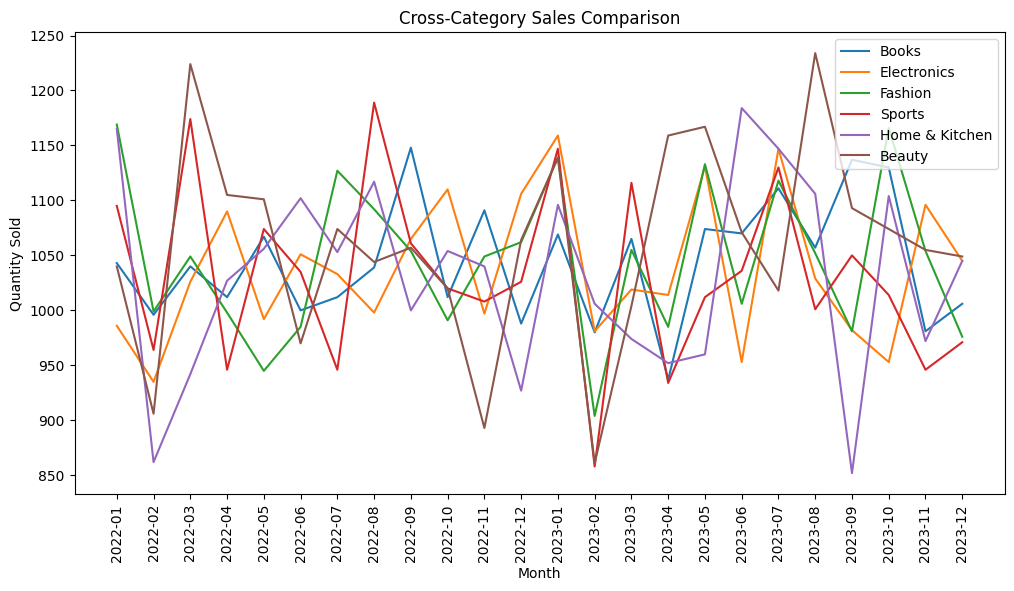

In [19]:
plt.figure(figsize=(12,6))

for category in ["Books", "Electronics", "Fashion","Sports","Home & Kitchen","Beauty"]:
    cat_df = monthly_category_sales[
        monthly_category_sales["product_category"] == category
    ]
    plt.plot(cat_df["month"].astype(str), cat_df["quantity_sold"], label=category)

plt.xlabel("Month")
plt.ylabel("Quantity Sold")
plt.title("Cross-Category Sales Comparison")
plt.xticks(rotation=90)
plt.legend()
plt.show()


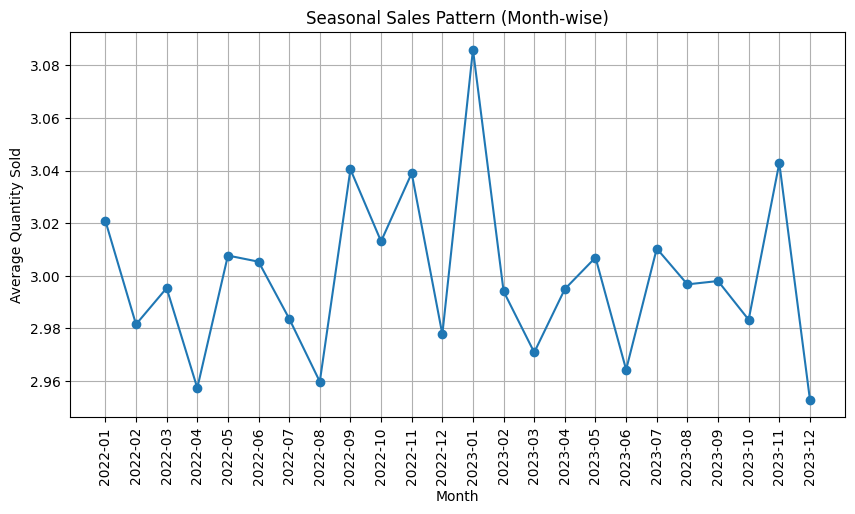

In [20]:
seasonal_pattern = (
    df.groupby("month")["quantity_sold"]
    .mean()
)

plt.figure(figsize=(10,5))
plt.plot(seasonal_pattern.index.astype(str), seasonal_pattern.values, marker='o')
plt.xlabel("Month")
plt.ylabel("Average Quantity Sold")
plt.title("Seasonal Sales Pattern (Month-wise)")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


In [23]:
# Create discount flag
df["is_discounted"] = df["discount_percent"] > 0

# Average quantity sold
discount_comparison = df.groupby("is_discounted")["quantity_sold"].mean()

print(discount_comparison)
# If True > False → discount increases sales ✅


is_discounted
False    2.986490
True     3.001939
Name: quantity_sold, dtype: float64


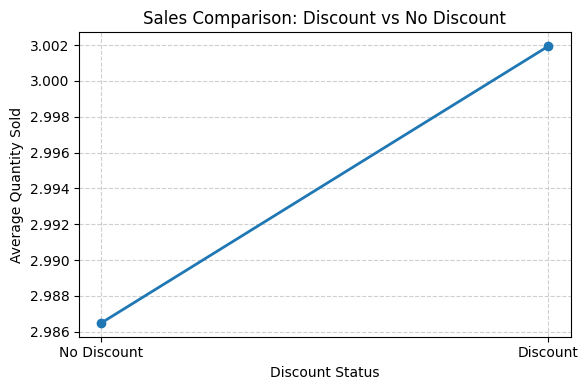

In [29]:
plt.figure(figsize=(6,4))

plt.plot(
    ["No Discount", "Discount"],
    discount_comparison.values,
    marker='o',
    linewidth=2
)

plt.xlabel("Discount Status")
plt.ylabel("Average Quantity Sold")
plt.title("Sales Comparison: Discount vs No Discount")

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


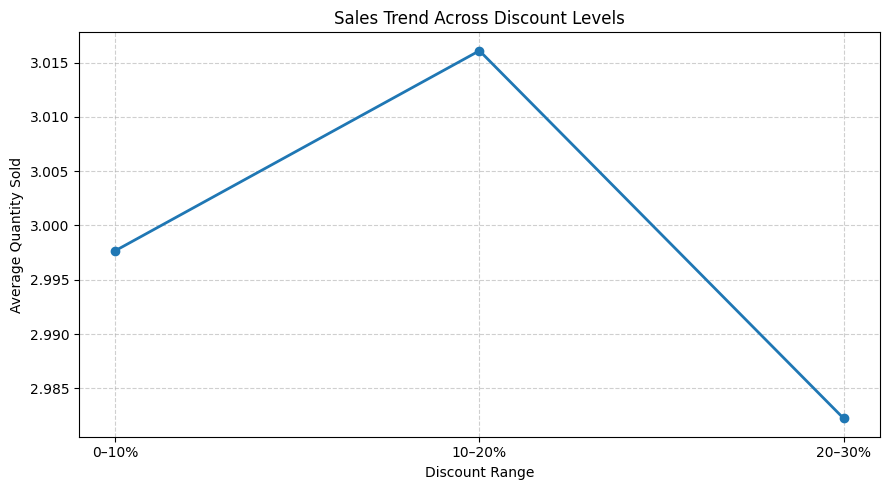

In [30]:
plt.figure(figsize=(9,5))

plt.plot(
    bucket_sales.index.astype(str),
    bucket_sales.values,
    marker='o',
    linewidth=2
)

plt.xlabel("Discount Range")
plt.ylabel("Average Quantity Sold")
plt.title("Sales Trend Across Discount Levels")

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


C:\Users\GANESH\AppData\Local\Temp\ipykernel_20580\4075733536.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(


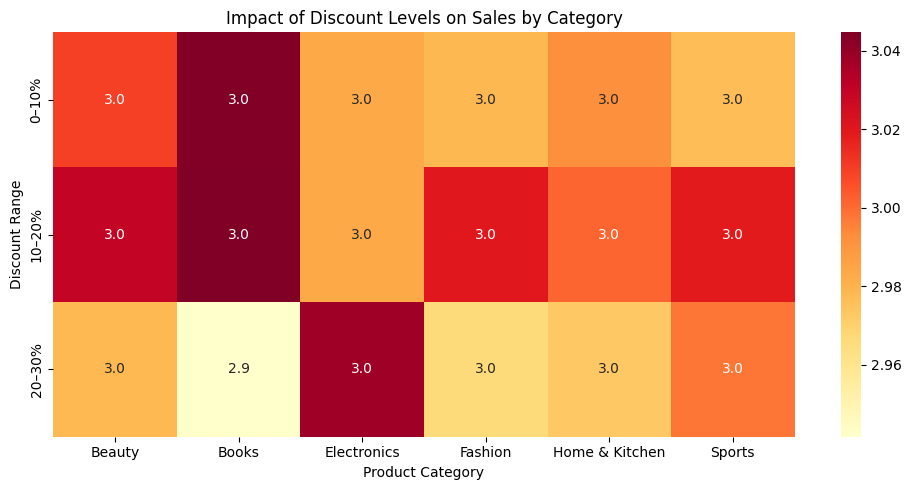

In [31]:
import seaborn as sns

pivot = df.pivot_table(
    values="quantity_sold",
    index="discount_bucket",
    columns="product_category",
    aggfunc="mean"
)

plt.figure(figsize=(10,5))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="YlOrRd")

plt.title("Impact of Discount Levels on Sales by Category")
plt.xlabel("Product Category")
plt.ylabel("Discount Range")
plt.tight_layout()
plt.show()


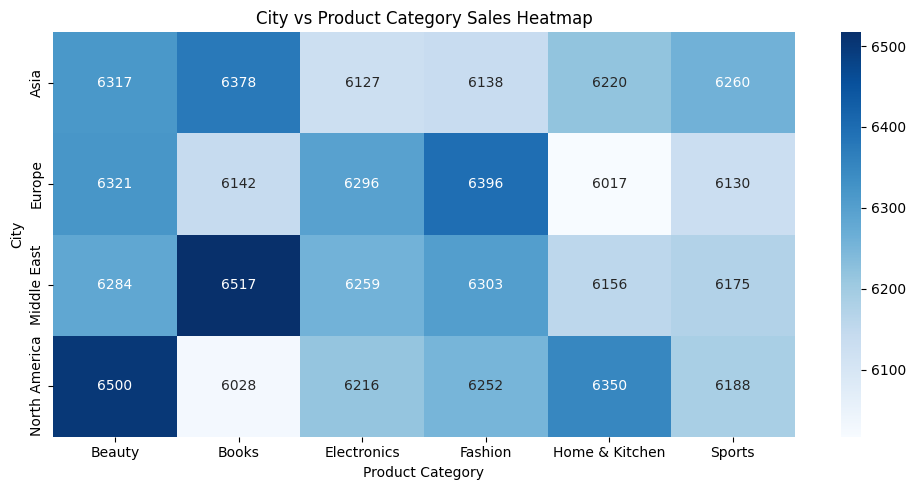

In [33]:
pivot_city = df.pivot_table(
    values="quantity_sold",
    index="customer_region",
    columns="product_category",
    aggfunc="sum"
)

plt.figure(figsize=(10,5))
sns.heatmap(pivot_city, annot=True, fmt=".0f", cmap="Blues")
plt.title("City vs Product Category Sales Heatmap")
plt.xlabel("Product Category")
plt.ylabel("City")
plt.tight_layout()
plt.show()


C:\Users\GANESH\AppData\Local\Temp\ipykernel_20580\2478192538.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_payment_discount = df.pivot_table(


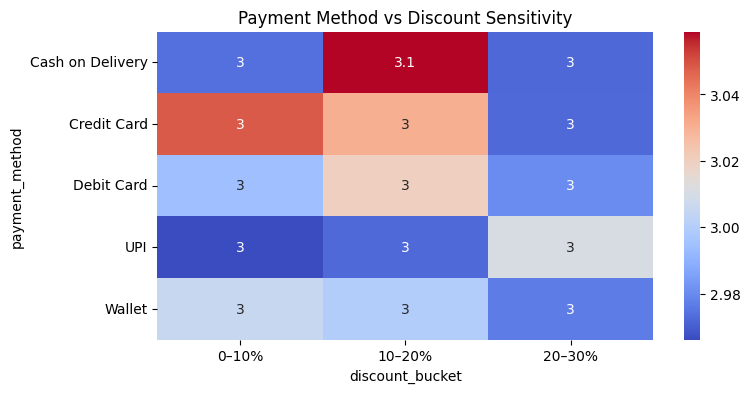

In [38]:
pivot_payment_discount = df.pivot_table(
    values="quantity_sold",
    index="payment_method",
    columns="discount_bucket",
    aggfunc="mean"
)

plt.figure(figsize=(8,4))
sns.heatmap(pivot_payment_discount, annot=True, cmap="coolwarm")
plt.title("Payment Method vs Discount Sensitivity")
plt.show()
